In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
adidas = pd.read_excel ('data/Adidas US Sales Datasets.xlsx', header=4)
adidas = adidas.iloc[:, 1:]
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
adidas.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [4]:
adidas.shape

(9648, 13)

In [5]:
adidas.duplicated().sum()

0

In [6]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [7]:
adidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [8]:
adidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [9]:
adidas[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']] = \
adidas[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']].astype(str)

In [10]:
# Remove non-numeric characters from 5 columns below
adidas['Price per Unit'] = adidas['Price per Unit'].str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Units Sold'] = adidas['Units Sold'].str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Total Sales'] = adidas['Total Sales'].str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Operating Margin'] = adidas['Operating Margin'].str.replace(r'[$, ]', '', regex=True).astype(float)

In [11]:
adidas.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                 float64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [12]:
# Extract Year and Month from Invoice Date
adidas['Year'] = adidas['Invoice Date'].dt.year
adidas['Month'] = adidas['Invoice Date'].dt.month

In [13]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [14]:
#Calculate Total Revenue
adidas['Total Sales'].sum()

899902125.0

In [15]:
#Calculate ‘YOY’ profit
adidas['YOY Profit'] = adidas['Operating Profit'].pct_change(periods=1) * 100
adidas[['Operating Profit', 'YOY Profit']].tail(15)

,Operating Profit,YOY Profit
9633,4606.00,53.471945
9634,2634.24,-42.808511
9635,2165.76,-17.784257
9636,1989.40,-8.143100
9637,2275.50,14.381220
9638,3513.60,54.410020
9639,2197.80,-37.448770
9640,1339.20,-39.066339
9641,935.55,-30.141129
9642,471.24,-49.629630


In [16]:
#Calculate average revenue
total_revenue = adidas['Total Sales'].sum()
number_of_periods = adidas.shape[0]
average_revenue = total_revenue / number_of_periods

print('Average Revenue: {}'.format(average_revenue))

Average Revenue: 93273.4375


In [17]:
#Calculate revenue for each year
revenue_per_year = adidas.groupby('Year')['Total Sales'].sum()
print('Revenue per Year \n{}'.format(revenue_per_year))

Revenue per Year 
Year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


In [18]:
#Calculate revenue for same period last year
revenue_last_year = []
for index, row in adidas.iterrows():
    same_period_last_year = adidas[(adidas['Year'] == row['Year'] - 1) & (adidas['Month'] == row['Month'])]
    revenue_last_year.append(same_period_last_year['Total Sales'].sum())

adidas['Revenue Last Year'] = revenue_last_year
adidas[['Total Sales', 'Revenue Last Year']].tail(15)

,Total Sales,Revenue Last Year
9633,9800.0,8026527.0
9634,6272.0,8026527.0
9635,6016.0,8026527.0
9636,5684.0,8026527.0
9637,6150.0,8026527.0
9638,8784.0,8026527.0
9639,5940.0,16253746.0
9640,3348.0,16253746.0
9641,3465.0,16253746.0
9642,1683.0,16253746.0


In [19]:
# Calculate average operating margin
average_operating_margin = adidas['Operating Margin'].mean()
print('Average Operating Margin: {}'.format(average_operating_margin))

Average Operating Margin: 0.42299129353233833


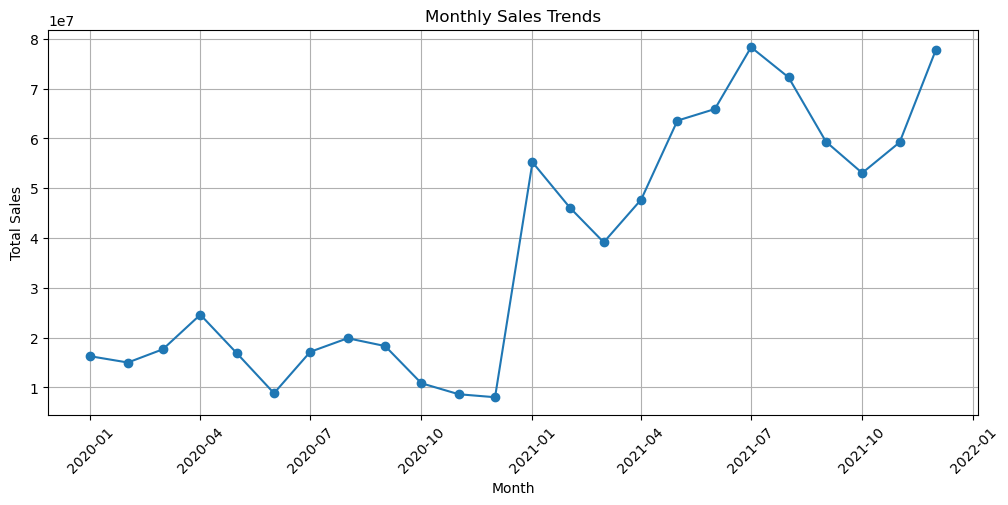

In [20]:
# Group by month and calculate total sales for each month
monthly_sales = adidas.groupby(adidas['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the sales trends over time
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
# Analyze the sales trends
diff = monthly_sales.diff()  # Calculate the difference between consecutive months
seasonality_threshold = 10000

# Check for seasonality
if (diff > seasonality_threshold).any():
    print("\nThese sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all() or (diff < 0).all():
    print("These sales follow a trend.")
else:
    print("\nThese sales do not follow a trend.")


These sales follow a seasonality.

These sales do not follow a trend.


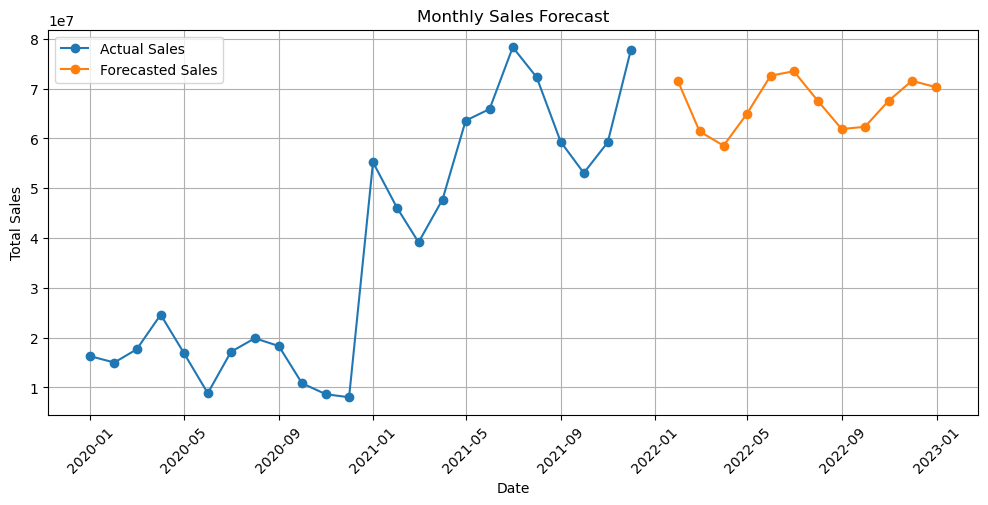

In [22]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()